# Training data

In [1]:
#!pip install jupyter

In [219]:
#!pip install hdf5storage

#!pip install mat4py

import os
import hdf5storage
from mat4py import savemat

path = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training'
os.chdir(path)
os.listdir()

['copia training',
 'I1.mat',
 'I10.mat',
 'I11.mat',
 'I12.mat',
 'I13.mat',
 'I14.mat',
 'I15.mat',
 'I16.mat',
 'I2.mat',
 'I3.mat',
 'I4.mat',
 'I5.mat',
 'I6.mat',
 'I7.mat',
 'I8.mat',
 'I9.mat',
 'O1.mat',
 'O10.mat',
 'O11.mat',
 'O12.mat',
 'O13.mat',
 'O14.mat',
 'O15.mat',
 'O16.mat',
 'O2.mat',
 'O3.mat',
 'O4.mat',
 'O5.mat',
 'O6.mat',
 'O7.mat',
 'O8.mat',
 'O9.mat',
 'resultado_eda_one',
 'resultado_one',
 'results',
 'results-area',
 'results_1',
 'results_2',
 'results_3',
 'results_one',
 'results_seg',
 'results_seg1',
 'timgs',
 'Training_final',
 'Training_indices.csv',
 'Training_Input.csv',
 'Training_Nopap_Output.csv',
 'Training_Output.csv',
 'TrainNopapoutput',
 'Trainoutput',
 'Trainoutput_ctdata',
 'train_input']

In [220]:

import scipy.io as sio
import numpy as np
f = sio.loadmat('I1.mat')
# print(f)
#for k, v in f.items():
#     print(k)
# print('---------')
D = f['I']
type(D)
D
#print('D:', D)
# for k,v in D.items():
#     print(k)
# print('---------')
Tf = D['tframe']
#print('TF:', Tf) prints all tframes for all images in I1 mat
# Tf
# for k,v in D.items():
#     print(k)
# print('---------')
# Iref = Tf['dicom']
Iref = Tf[0,0]
#print ('Iref:', Iref) #la saca del nest
x,y = Iref.shape #las celdas ya inside el nest para dar clic individualmente y ver el matrix de cada una, shape 1,90 so 90 cols
#print( 'x,y:', x,y) #

path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/Training_final"

os.chdir(path)
for i in range(y): #90 cols
    i
    I = Iref[0,i]
    I1 = np.asarray(I[0])
    fsave = 'Image'+str(i)+'.mat'
    sio.savemat(fsave, {'I':I})
    



# I1
# I = float(I)
# type(I1)
# I1.shape
# import matplotlib.pyplot as plt
# plt.imshow(I1, cmap="gray")


x,y: 1 90


In [5]:
s=1
fsave = 'Image'+str(s)+'.mat'
fsave

'Image1.mat'

In [6]:
#pip install --upgrade pandas


In [7]:
import scipy.io as sio
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt


# Define the columns for the DataFrame
cols = ['Training_Input_File']

# Create a new DataFrame object
df = pd.DataFrame(columns=cols)
print(df)
print(type(df))


# Define image dimensions for resizing
width = 256
height = 256
dim = (width, height)

# Initialize count for file naming
count = 1

# # Iterate over each image file
for i in range(16):
    # Set the path to the directory containing the original images
    path = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training'
    os.chdir(path)
    
    # Load the original image from MATLAB file
    fload = 'I' + str(i+1) + '.mat'
    f = sio.loadmat(fload)
    D = f['I']
    Tf = D['tframe']
    Iref = Tf[0, 0]
    x, y = Iref.shape
    
#     # Set the path to the directory where resized images will be saved
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/train_input"
    os.chdir(path)
    
    # Iterate over each image in the original image set
    for j in range(y):
        # Extract the image data
        I = Iref[0, j]
        I1 = np.asarray(I[0])
        #print(I1)
        

        # plt.imshow(I1, cmap='gray')
        # plt.show()

        
        # Resize the image
        U = cv2.resize(I1, dim, interpolation=cv2.INTER_AREA)
        #print('u:',U)


        # Display the resized image
        # plt.imshow(U, cmap='gray')
        # plt.show()

        
        # Generate file name for the resized image
        fsave = 'Image' + str(count).zfill(5) + '.mat' #zfill for consistent format
        
        # Save the resized image as a MATLAB .mat file
        sio.savemat(fsave, {'U': U})
        
#         # Update count for file naming
        count += 1
        # Add a new row to the DataFrame
        # new_row = pd.Series([fsave], index=cols)
        # df = df.append(new_row, ignore_index=True)
        new_row = pd.DataFrame({'Training_Input_File': [fsave]})
        df = pd.concat([df, new_row], ignore_index=True)


#         #df = df.append(pd.Series([fsave],index=df.columns), ignore_index=True)

# # # Set the path to the directory where the CSV file will be saved
path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training"
os.chdir(path)

# # Save the DataFrame as a CSV file
df.to_csv('Training_Input.csv', index=False)


Empty DataFrame
Columns: [Training_Input_File]
Index: []
<class 'pandas.core.frame.DataFrame'>


# Trans to bmp

In [230]:
import os
import cv2
import scipy.io as sio
import numpy as np
import pandas as pd

# Define the columns for the DataFrame
cols = ['Training_Input_File']

# Create a new DataFrame object
df = pd.DataFrame(columns=cols)

# Define image dimensions for resizing
width = 256
height = 256
dim = (width, height)

# Initialize count for file naming
count = 1

# Set the path to the directory containing the original images
input_folder = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training'

# Set the path to the directory where resized images will be saved
output_folder = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/train_input_bmp'

# Ensure output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate over each image file
for i in range(16):
    # Load the original image from MATLAB file
    fload = os.path.join(input_folder, 'I' + str(i+1) + '.mat')
    f = sio.loadmat(fload)
    D = f['I']
    Tf = D['tframe']
    Iref = Tf[0, 0]
    x, y = Iref.shape
    
    # Iterate over each image in the original image set
    for j in range(y):
        # Extract the image data
        I = Iref[0, j]
        I1 = np.asarray(I[0])
        
        # Resize the image
        U = cv2.resize(I1, dim, interpolation=cv2.INTER_AREA)
        
        # Generate file name for the resized image
        fsave = os.path.join(output_folder, 'Image' + str(count).zfill(5) + '.bmp')
        
        # Save the resized image as BMP
        cv2.imwrite(fsave, U)
        
        # Update count for file naming
        count += 1
        
        # Add a new row to the DataFrame
        new_row = pd.DataFrame({'Training_Input_File': [fsave]})
        df = pd.concat([df, new_row], ignore_index=True)

# Save the DataFrame as a CSV file
output_csv = os.path.join(input_folder, 'Training_Input.csv')
df.to_csv(output_csv, index=False)


256

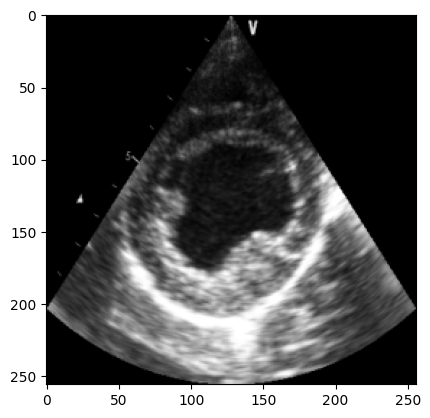

In [8]:
path = path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/Train_input"
os.chdir(path)
I2 = sio.loadmat('Image00001.mat')
#S2 = sio.loadmat('Segment1.mat')
#I2.keys()
I3 = I2['U']
I3
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(I3, cmap="gray") 
[h,w] = np.shape(I3)
h
w


# # width = 256
# # height = 256
# dim = (width, height)
# # resize image
# resized = cv2.resize(I3, dim, interpolation = cv2.INTER_AREA)
# plt.imshow(resized, cmap="gray") 

In [9]:
# # Load the MATLAB file
# data = sio.loadmat('Image1.mat')

# # Access the appropriate key to retrieve the data
# I3 = data['I']

# # Display the data
# print(I3)


In [10]:
#pip install mat73


In [231]:
# import scipy.io as sio
# import os
# import mat73
# #from mat73 import loadmat


# path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training"
# os.chdir(path)


# i = 0
# fload = 'O'+str(i+1)+'.mat'
# # print(fload)
# # print(len(fload))
# f = sio.loadmat(fload)
# #f = sio.loadmat(fload)
# #print(f)
# # for k, v in f.items():
# #     print('k:',k)
# # print('---------')
# D = f['output']
# print(D)
# #print(D.shape)
# s = 0
# # print(f)
# Ditems = D['Inner_with_Papillary_Muscles']
# Ditems1 = D['Outer']

# print(Ditems.shape)
# print(Ditems1.shape)

# Cs = Ditems[32][0]
# Cs1 = Ditems1[32][0]
# print(Cs)
# inX=[]
# outX=[]
# inY=[]
# outY=[]
# for i in range(len(Cs)):
#     ins= Cs[i][0]
#     inX.append(ins)
#     iy=Cs[i][1]
#     inY.append(iy)
#     ous=Cs1[i][0]
#     outX.append(ous)
#     oy=Cs1[i][1]
#     outY.append(oy)
    

# # inX=np.array(inX)
# # outX=np.array(outX)
# # inY=np.array(inY)
# # outY=np.array(outY)

# #print(outX)
# #print(inY)

# #outX = Cs[10,:,s]
# #inY = Cs1[0,:,s]
# #outY = Cs1[10,:,s]

In [92]:
import scipy.io as sio
import os
import mat73
path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training"
os.chdir(path)
i = 0
fload = 'O'+str(i+1)+'.mat'
#f = mat73.loadmat(fload)
f = sio.loadmat(fload)
#print(f)
for k, v in f.items():
    print(k)
print('---------')
D = f['output']
s = 0
print('shape of D:',D.shape)
# D_head = D[0][0] #gives three output coordiantes complete for first row 
# print(D_head)
# #print(f)
Ditems = D['Inner_with_Papillary_Muscles']
print('shape of ditems:', Ditems.shape)

Ditems1 = D['Outer']
print('shape of ditems1:', Ditems.shape)
# Cs = Ditems[0][32]
# Cs1 = Ditems1[0][32]
# #print(Cs)
# inX=[]
# outX=[]
# inY=[]
# outY=[]
# for i in range(len(Cs)):
#     coor= Cs[0][i] #element
#     print(coor.shape)
#     #ins= coor[
#     inX.append(ins)
#     iy=Cs[1][0]
#     inY.append(iy)
#     ous=Cs1[0][i]
#     outX.append(ous)
#     oy=Cs1[1][i]
#     outY.append(oy)

# inX=np.array(inX)
# outX=np.array(outX)
# inY=np.array(inY)
# outY=np.array(outY)

# #print(outX)
# #print(inY)

# #outX = Cs[10,:,s]
# #inY = Cs1[0,:,s]
# #outY = Cs1[10,:,s]

__header__
__version__
__globals__
output
---------
shape of D: (1, 90)
shape of ditems: (1, 90)
shape of ditems1: (1, 90)


In [70]:
import scipy.io as sio
import os
import mat73
path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training"
os.chdir(path)
i = 1
fload = 'O'+str(i+1)+'.mat'
f = sio.loadmat(fload)
#print(f)
for k, v in f.items():
    print(k)
print('---------')
D = f['output']
s = 0
#print(f)
Ditems = D['Inner_with_Papillary_Muscles']
Ditems1 = D['Outer']

Cs = Ditems[0,70]
#print(Cs)
Cs1 = Ditems1[0,70]

  
s=0
print(Ditems.shape)
inX=Cs[0,0][:,0]
print(inX.shape)

outX=Cs1[0,0][:,0]
inY=Cs[0,0][:,1]
outY=Cs1[0,0][:,1]


__header__
__version__
__globals__
output
---------
(1, 109)
(102,)


(250.0, 0.0)

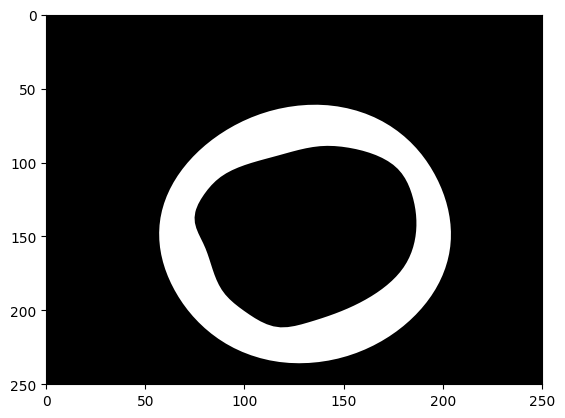

In [189]:
import matplotlib.pyplot as plt
w=250
h=250
plt.fill_between(outX, outY, 0, facecolor='white',)
plt.xlim([0,w])
plt.ylim([0,h])
plt.fill_between(inX, inY, 0, facecolor='black')
plt.xlim([0,w])
plt.ylim([0,h])
plt.rcParams['axes.facecolor'] = 'black'
ax=plt.gca()                            
ax.set_ylim(ax.get_ylim()[::-1])

(250.0, 0.0)

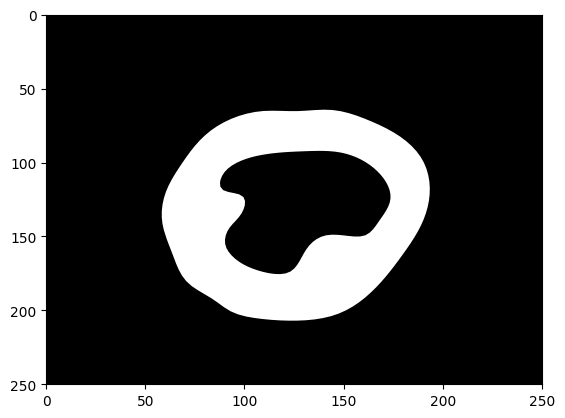

In [73]:
import matplotlib.pyplot as plt
w=250
h=250
plt.fill_between(outX, outY, 0, facecolor='white',)
plt.xlim([0,w])
plt.ylim([0,h])
plt.fill_between(inX, inY, 0, facecolor='black')
plt.xlim([0,w])
plt.ylim([0,h])
plt.rcParams['axes.facecolor'] = 'black'
ax=plt.gca()                            
ax.set_ylim(ax.get_ylim()[::-1])

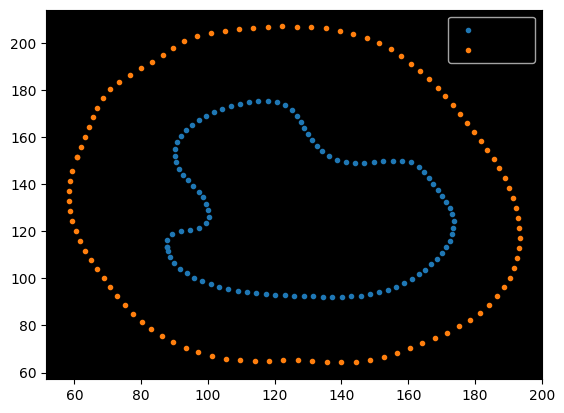

In [76]:
plt.scatter(inX,inY,label='inner',marker='.')
plt.scatter(outX,outY,label='outer',marker='.')
#fig.set_size_inches(w/float(DPI),h/float(DPI))
#plt.xlim([0,w])
#plt.ylim([0,h])
plt.legend()
#plt.imshow(X, cmap="gray")
#plt.imshow(np.flipud(X), cmap="gray",origin='lower') 
plt.show()
#print(Cs['yctrack'].value)

In [85]:
x,y,z= Cs.shape
x
y

1

In [164]:
import scipy.io as sio
import numpy as np
import cv2
import pandas as pd
cols = ['Training_Output_File']
dfk = pd.DataFrame(columns=cols)

width = 256
height = 256
dim = (width, height)
count = 1
for i in range(16):
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training"
    os.chdir(path)
    fload = 'O'+str(i+1)+'.mat'
    f = sio.loadmat(fload) 
    D = f['output']
    Ditems = D['Inner_with_Papillary_Muscles']
    Ditems1 = D['Outer']
    #print(f'shape of ditems for O {i+1} mat file', Ditems.shape)
    #print(len(Ditems))
    num_columns = Ditems.shape[1]  # Get the number of columns
    for j in range(num_columns):
        path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/Trainoutput"
        os.chdir(path)
        Cs = Ditems[0][j]
        #print('shape of CS:',Cs.shape)
        Cs1 = Ditems1[0][j]
        #print('shape of CS1:',Cs1.shape)
        inX=[]
        outX=[]
        inY=[]
        outY=[]
        #print(Cs.shape[2])
        #print('Cs:',Cs)
        # for z in range(len(Cs)):
        #     inner_array = Cs[0][0]  # Access the nested array
        #     print('inner_array_shape:', inner_array.shape)
        #     print("inner_array:",inner_array)
        #     for element in inner_array:
        #         # ins = element[0][0]  # Access the first element of the nested array
        #         # # inX.append(ins)
        #         # # print('inX:', inX)
        #         # # iy = element[1][0]  # Access the second element of the nested array
        #         # # inY.append(iy)
        #         # # print('inY:', inY)
                
                
        #         ins= Cs[z][0]
        #         inX.append(ins)
        #         iy=Cs[z][1]
        #         inY.append(iy)
        #         ous=Cs1[z][0]
        #         outX.append(ous)
        #         oy=Cs1[z][1]
        #         outY.append(oy)

        for inner_array_cs, inner_array_cs1 in zip(Cs[0], Cs1[0]): #Cs[0] MEANS first layer in Cs
            for element in inner_array_cs:
                ins = element[0]  # Access the first element of the nested array
                inX.append(ins)
                iy = element[1]  # Access the second element of the nested array
                inY.append(iy)
                #print('inx, iny:', inX, inY)
            
        
            for element in inner_array_cs1:
                ous = element[0]  # Access the first element of the nested array
                outX.append(ous)
                oy = element[1]  # Access the second element of the nested array
                outY.append(oy)

        
        inX=np.array(inX)
        #print(inX.shape)
        outX=np.array(outX)
        #print(outX.shape)
        inY=np.array(inY)
        #print(inY.shape)
        outY=np.array(outY)
        #print(outY.shape)
        contours1 = np.zeros((len(inner_array_cs),2)) 
        #print(contours1.shape)
        contours2 = np.zeros((len(inner_array_cs1),2)) 
        #print(contours2.shape)
        
        count_len = len(inX)
        #print(count_len)
        for w in range(count_len):
            contours1[w] =[inX[w],inY[w]]
            contours2[w] =[outX[w],outY[w]]   
        img1 = np.zeros( (339,413) ) # create a single channel 200x200 pixel black image 
        cv2.fillPoly(img1, np.int32([contours1]), color=(255,255,255))
        img2 = np.zeros( (339,413) ) # create a single channel 200x200 pixel black image 
        cv2.fillPoly(img2, np.int32([contours2]), color=(255,255,255))
        Seg = img2-img1
        S = cv2.resize(Seg, dim, interpolation = cv2.INTER_AREA)
        fsave = 'Segment'+str(count).zfill(5)+'.mat'
        sio.savemat(fsave, {'S':S})
        count = count + 1
        #dfk = dfk.append(pd.Series([fsave],index=dfk.columns), ignore_index=True)
        new_row = pd.Series([fsave], index=cols)
        dfk = pd.concat([dfk, new_row], ignore_index=True)







# Create training data with pap


In [178]:
import scipy.io as sio
import numpy as np
import cv2
import pandas as pd
width = 256
height = 256
dim = (width, height)
count = 0
for i in range(16):
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training"
    os.chdir(path)
    fload = 'O'+str(i+1)+'.mat'
    f = sio.loadmat(fload)
    D = f['output']
    Ditems = D['Inner_with_Papillary_Muscles']
    Ditems1 = D['Outer']
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/Trainoutput_ctdata"
    x,y=Ditems.shape
    print ('shape of ditems:',x,y)
    os.chdir(path)
    #print(Ditems)
    print('range y:', range(y))
    for k in range(y):
        Cs=Ditems[0,k]
        #print('cs shape:',Cs.shape)
        Cs1=Ditems1[0,k]
        inX=Cs[0,0][:,0] # x coord in inner with pap
        #print('inx shape:', inX.shape)
        outX=Cs1[0,0][:,0] #x coord in outer
        #print('outx shape:', outX.shape)
        inY=Cs[0,0][:,1]
        #print('inY shape:', inY.shape)
        outY=Cs1[0,0][:,1]
        #print('outY shape:', outY.shape)
        #print( 'len inx:', len(inX))
        contours1 = np.zeros((len(inX),2))     
        contours2 = np.zeros((len(inX),2)) 
        count_lens = len(inX)
        
        for w in range(count_lens):
            contours1[w]=[inX[w],inY[w]]
            contours2[w]=[outX[w],outY[w]]
        img1 = np.zeros( (256,256) ) # create a single channel 200x200 pixel black image 
        cv2.fillPoly(img1, np.int32([contours1]), color=(255,255,255))
        img2 = np.zeros( (256,256) ) # create a single channel 200x200 pixel black image 
        cv2.fillPoly(img2, np.int32([contours2]), color=(255,255,255))
        Seg = img2-img1
        S = cv2.resize(Seg, dim, interpolation = cv2.INTER_AREA)
        count = count + 1
        fsave = 'Segment'+str(count).zfill(5)+'.mat'
        sio.savemat(fsave, {'S':S})
       # df = df.append(pd.Series([fsave],index=df.columns), ignore_index=True)
        #df = pd.concat([df, pd.Series([fsave], index=df.columns)], ignore_index=True)
        new_row = pd.Series([fsave], index=cols)
        dfk = pd.concat([dfk, new_row], ignore_index=True)


path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training"
os.chdir(path)
df.to_csv('Training_Output.csv',index=False)






shape of ditems: 1 90
range y: range(0, 90)
cs shape: (1, 1)
inx shape: (102,)
outx shape: (102,)
inY shape: (102,)
outY shape: (102,)
len inx: 102
cs shape: (1, 1)
inx shape: (102,)
outx shape: (102,)
inY shape: (102,)
outY shape: (102,)
len inx: 102
cs shape: (1, 1)
inx shape: (102,)
outx shape: (102,)
inY shape: (102,)
outY shape: (102,)
len inx: 102
cs shape: (1, 1)
inx shape: (102,)
outx shape: (102,)
inY shape: (102,)
outY shape: (102,)
len inx: 102
cs shape: (1, 1)
inx shape: (102,)
outx shape: (102,)
inY shape: (102,)
outY shape: (102,)
len inx: 102
cs shape: (1, 1)
inx shape: (102,)
outx shape: (102,)
inY shape: (102,)
outY shape: (102,)
len inx: 102
cs shape: (1, 1)
inx shape: (102,)
outx shape: (102,)
inY shape: (102,)
outY shape: (102,)
len inx: 102
cs shape: (1, 1)
inx shape: (102,)
outx shape: (102,)
inY shape: (102,)
outY shape: (102,)
len inx: 102
cs shape: (1, 1)
inx shape: (102,)
outx shape: (102,)
inY shape: (102,)
outY shape: (102,)
len inx: 102
cs shape: (1, 1)
inx

# trans to png

In [235]:
import os
import cv2
import scipy.io as sio
import numpy as np
import pandas as pd

# Define the columns for the DataFrame
cols = ['Training_Output_File']

# Create a new DataFrame object
df = pd.DataFrame(columns=cols)

# Define image dimensions for resizing
width = 256
height = 256
dim = (width, height)

# Initialize count for file naming
count = 0

# Set the path to the directory containing the original images
input_folder = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training'

# Set the path to the directory where resized images will be saved
output_folder = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/train_output_png'

# Ensure output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate over each image file
for i in range(16):
    # Load the original image from MATLAB file
    fload = os.path.join(input_folder, 'O' + str(i+1) + '.mat')
    f = sio.loadmat(fload)
    D = f['output']
    Ditems = D['Inner_with_Papillary_Muscles']
    Ditems1 = D['Outer']
    x, y = Ditems.shape
    
    # Iterate over each image in the original image set
    for k in range(y):
        Cs = Ditems[0, k]
        Cs1 = Ditems1[0, k]
        inX = Cs[0, 0][:, 0]
        outX = Cs1[0, 0][:, 0]
        inY = Cs[0, 0][:, 1]
        outY = Cs1[0, 0][:, 1]
        
        contours1 = np.zeros((len(inX), 2))     
        contours2 = np.zeros((len(inX), 2)) 
        
        for w in range(len(inX)):
            contours1[w] = [inX[w], inY[w]]
            contours2[w] = [outX[w], outY[w]]
        
        img1 = np.zeros((256, 256))
        cv2.fillPoly(img1, np.int32([contours1]), color=(255, 255, 255))
        img2 = np.zeros((256, 256))
        cv2.fillPoly(img2, np.int32([contours2]), color=(255, 255, 255))
        Seg = img2 - img1
        S = cv2.resize(Seg, dim, interpolation=cv2.INTER_AREA)
        
        count += 1
        fsave = os.path.join(output_folder, 'Segment' + str(count).zfill(5) + '.png')
        cv2.imwrite(fsave, S)
        
        # Add a new row to the DataFrame
        new_row = pd.DataFrame({'Training_Output_File': [fsave]})
        df = pd.concat([df, new_row], ignore_index=True)

# Save the DataFrame as a CSV file
output_csv = os.path.join(input_folder, 'Training_Output.csv')
df.to_csv(output_csv, index=False)


In [186]:
import scipy.io as sio
import numpy as np
import cv2
import pandas as pd
cols = ['Training_Output_File']
colsi=['Indices']
df = pd.DataFrame(columns=cols)
dfi=pd.DataFrame(columns=colsi)
width = 256
height = 256
dim = (width, height)
count = 0

for i in range(16):
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training"
    os.chdir(path)
    fload = 'O'+str(i+1)+'.mat'
    f= sio.loadmat(fload)
    D = f['output']
    Ditems = D['Inner_without_Papillary_Muscles']
    Ditems1 = D['Outer']
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/TrainNopapoutput"
    os.chdir(path)
    x,y=Ditems.shape


   # print ('shape of ditems:',x,y)

    #print(Ditems)
    #print('range y:', range(y))
    for k in range(y):
        Cs=Ditems[0,k]
        #print('cs shape:',Cs.shape)
        Cs1=Ditems1[0,k]
        inX=Cs[0,0][:,0] # x coord in inner with pap
        #print('inx shape:', inX.shape)
        outX=Cs1[0,0][:,0] #x coord in outer
        #print('outx shape:', outX.shape)
        inY=Cs[0,0][:,1]
        #print('inY shape:', inY.shape)
        outY=Cs1[0,0][:,1]
        #print('outY shape:', outY.shape)
        #print( 'len inx:', len(inX))
        contours1 = np.zeros((len(inX),2))     
        contours2 = np.zeros((len(inX),2)) 
        count_lens = len(inX)
        
        for w in range(count_lens):
            contours1[w]=[inX[w],inY[w]]
            contours2[w]=[outX[w],outY[w]]
        img1 = np.zeros( (256,256) ) # create a single channel 200x200 pixel black image 
        cv2.fillPoly(img1, np.int32([contours1]), color=(255,255,255))
        img2 = np.zeros( (256,256) ) # create a single channel 200x200 pixel black image 
        cv2.fillPoly(img2, np.int32([contours2]), color=(255,255,255))
        Seg = img2-img1
        S = cv2.resize(Seg, dim, interpolation = cv2.INTER_AREA)
        count = count + 1
        fsave = 'Segment'+str(count).zfill(5)+'.mat'
        sio.savemat(fsave, {'S':S})
        
        new_row_df = pd.Series([fsave], index=cols)
        df = pd.concat([df, new_row_df], ignore_index=True)
        
        new_row_dfi = pd.Series([count], index=cols)
        dfi = pd.concat([dfi, new_row_dfi], ignore_index=True)

path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training"        
os.chdir(path)
df.to_csv('Training_Nopap_Output.csv',index=False)
dfi.to_csv('Training_indices.csv', index=False)







In [193]:
# path='/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/Training_Nopap_Output.csv'
# df = pd.read_csv (path)
# output=df['Training_Output_File']
# fload=output[0]
# print(fload)
# os.chdir(path)
# I1=sio.loadmat(fload)

In [194]:
# path = "/media/beta/navchetan-beps/Lars_BEP/Training_Output.csv"
# os.chdir(path)
# I2 = sio.loadmat('segment00001.mat')
# # S2 = sio.loadmat('Segment1.mat')
# I4 = I2['Seg']
# I4
# import matplotlib.pyplot as plt
# import numpy as np
# plt.imshow(I4, cmap="gray") 
# [h,w] = np.shape(I4)
# h
# w


# width = 256
# height = 256
# dim = (width, height)
# # resize image
# resized = cv2.resize(I4, dim, interpolation = cv2.INTER_AREA)
# plt.imshow(resized, cmap="gray") 
 
# print('Resized Dimensions : ',resized.shape)

In [229]:
# path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/Training_final"
# import scipy.io as sio

# os.chdir(path)
# I2 = sio.loadmat('Image1.mat')
# # S2 = sio.loadmat('Segment1.mat')
# I3 = I2['I']
# I3
# import matplotlib.pyplot as plt
# import numpy as np
# plt.imshow(I3, cmap="gray") 
# [h,w] = np.shape(I3)
# h
# w

In [ ]:
import cv2
import numpy as np
# biggest = np.amax(I3)
# I3 = I3/biggest

edges = cv2.Canny(I3,250,254)

plt.subplot(121),plt.imshow(I3,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
plt.imshow((I3), cmap="gray") 
plt.imshow((I4), cmap="gray",alpha =0.5) 
# plt.rcParams['axes.facecolor'] = 'black'
ax=plt.gca()                            # get the axis
# ax.set_ylim(ax.get_ylim()[::-1])

In [ ]:
# validation data creation utlizing samples
# input and output

# Validation

In [236]:
# import os
# import hdf5storage
# from mat4py import savemat
# path = "/media/beta/navchetan-beps/Lars_BEP/Validation"
# os.chdir(path)
# os.listdir()

In [ ]:
# import scipy.io as sio
# import numpy as np
# import os
# import cv2
# import pandas as pd
# import mat73
# cols = ['Validation_Input_File']
# df = pd.DataFrame(columns=cols)

# width = 256
# height = 256
# dim = (width, height)
# count = 1
# for i in range(4):
#     path = "/media/beta/navchetan-beps/Lars_BEP/Validation"
#     os.chdir(path)
#     fload = 'I'+str(i+1)+'.mat'
#     f = sio.loadmat(fload)
#     D = f['I']
#     Tf = D['tframe']
#     Iref = Tf[0,0]
#     x,y = Iref.shape
#     path = "/media/beta/navchetan-beps/Lars_BEP/Validationinput"
#     os.chdir(path)
#     for j in range(y):
#         j
#         I = Iref[0,j]
#         I1 = np.asarray(I[0])
#         U = cv2.resize(I1, dim, interpolation = cv2.INTER_AREA)
#         fsave = 'Image'+str(count).zfill(5)+'.mat'
#         sio.savemat(fsave, {'U':U})
#         count = count + 1
#         df = df.append(pd.Series([fsave],index=df.columns), ignore_index=True)

# path = "/media/beta/navchetan-beps/Lars_BEP"
# os.chdir(path)
# df.to_csv('Validation_Input.csv',index=False)

In [ ]:
# import scipy.io as sio
# import numpy as np
# import cv2
# import pandas as pd
# cols = ['Validation_Output_File']
# colsi=['Indices']
# df = pd.DataFrame(columns=cols)
# dfi=pd.DataFrame(columns=colsi)
# width = 256
# height = 256
# dim = (width, height)
# count = 0
# for i in range(4):
#     path = "/media/beta/navchetan-beps/Lars_BEP/Validation"
#     os.chdir(path)
#     fload = 'O'+str(i+1)+'.mat'
#     f = sio.loadmat(fload)
#     D = f['output']
#     Ditems = D['Inner_with_Papillary_Muscles']
#     Ditems1 = D['Outer']
#     path = "/media/beta/navchetan-beps/Lars_BEP/Valoutput"
#     x,y=Ditems.shape
#     os.chdir(path)
#     #print(Ditems)
#     for k in range(y):
#         Cs=Ditems[0,k]
#         Cs1=Ditems1[0,k]
#         #print(Cs1)
#         inX=Cs[0,0][:,0]
#         outX=Cs1[0,0][:,0]
#         inY=Cs[0,0][:,1]
#         outY=Cs1[0,0][:,1]
#         contours1 = np.zeros((len(inX),2))     
#         contours2 = np.zeros((len(inX),2)) 
#         count_lens = len(inX)
#         for w in range(count_lens):
#             contours1[w]=[inX[w],inY[w]]
#             contours2[w]=[outX[w],outY[w]]
#         img1 = np.zeros( (256,256) ) # create a single channel 200x200 pixel black image 
#         cv2.fillPoly(img1, np.int32([contours1]), color=(255,255,255))
#         img2 = np.zeros( (256,256) ) # create a single channel 200x200 pixel black image 
#         cv2.fillPoly(img2, np.int32([contours2]), color=(255,255,255))
#         Seg = img2-img1
#         S = cv2.resize(Seg, dim, interpolation = cv2.INTER_AREA)
#         count = count + 1
#         fsave = 'Segment'+str(count).zfill(5)+'.mat'
#         sio.savemat(fsave, {'S':S})
#         df = df.append(pd.Series([fsave],index=df.columns), ignore_index=True)
#         dfi=dfi.append(pd.Series([count], index=dfi.columns), ignore_index=True)
        
# path = "/media/beta/navchetan-beps/Lars_BEP/"
# os.chdir(path)
# df.to_csv('Validation_Output.csv',index=False)
# dfi.to_csv('Validation_indices.csv', index=False)

In [ ]:
# import scipy.io as sio
# import numpy as np
# import cv2
# import pandas as pd
# cols = ['Validation_Output_File']
# colsi=['Indices']
# df = pd.DataFrame(columns=cols)
# dfi=pd.DataFrame(columns=colsi)
# width = 256
# height = 256
# dim = (width, height)
# count = 1
# for i in range(4):
#     path = "/media/beta/navchetan-beps/Lars_BEP/Validation"
#     os.chdir(path)
#     fload = 'O'+str(i+1)+'.mat'
#     f = sio.loadmat(fload)
#     D = f['output']
#     Ditems = D['Inner_without_Papillary_Muscles']
#     Ditems1 = D['Outer']
#     path = "/media/beta/navchetan-beps/Lars_BEP/ValNopapoutput"
#     x,y=Ditems.shape
#     os.chdir(path)
#     #print(Ditems)
#     for k in range(y):
#         Cs=Ditems[0,k]
#         Cs1=Ditems1[0,k]
#         inX=Cs[0,0][:,0]
#         outX=Cs1[0,0][:,0]
#         inY=Cs[0,0][:,1]
#         outY=Cs1[0,0][:,1]
#         contours1 = np.zeros((len(inX),2))     
#         contours2 = np.zeros((len(inX),2)) 
#         count_lens = len(inX)
#         for w in range(count_lens):
#             contours1[w]=[inX[w],inY[w]]
#             contours2[w]=[outX[w],outY[w]]
#         img1 = np.zeros( (256,256) ) # create a single channel 200x200 pixel black image 
#         cv2.fillPoly(img1, np.int32([contours1]), color=(255,255,255))
#         img2 = np.zeros( (256,256) ) # create a single channel 200x200 pixel black image 
#         cv2.fillPoly(img2, np.int32([contours2]), color=(255,255,255))
#         Seg = img2-img1
#         S = cv2.resize(Seg, dim, interpolation = cv2.INTER_AREA)
#         fsave = 'Segment'+str(count).zfill(5)+'.mat'
#         sio.savemat(fsave, {'S':S})
#         count = count + 1
#         df = df.append(pd.Series([fsave],index=df.columns), ignore_index=True)
        
# path = "/media/beta/navchetan-beps/Lars_BEP/"
# os.chdir(path)
# df.to_csv('Validation_Nopap_Output.csv',index=False)

In [ ]:
# import scipy.io as sio
# import numpy as np
# import os
# import cv2
# import pandas as pd
# cols = ['Validation_Input_File']
# df = pd.DataFrame(columns=cols)

# width = 256
# height = 256
# dim = (width, height)
# count = 1
# for i in range(9):
#     path = "D:\TUE_Work\Louis\DataForNachetanReformatted\DataForNachetanReformatted\Data\Validation"
#     os.chdir(path)
#     fload = 'I'+str(i+1)+'.mat'
#     f = sio.loadmat(fload)
#     D = f['I']
#     Tf = D['tframe']
#     Iref = Tf[0,0]
#     x,y = Iref.shape
#     path = "D:\TUE_Work\Louis\DataForNachetanReformatted\DataForNachetanReformatted\Data\Validation_Input"
#     os.chdir(path)
#     for j in range(y):
#         j
#         I = Iref[0,j]
#         I1 = np.asarray(I[0])
#         U = cv2.resize(I1, dim, interpolation = cv2.INTER_AREA)
#         fsave = 'Image'+str(count).zfill(5)+'.mat'
#         sio.savemat(fsave, {'U':U})
#         count = count + 1
#         df = df.append(pd.Series([fsave],index=df.columns), ignore_index=True)

# path = "D:\TUE_Work\Louis\DataForNachetanReformatted\DataForNachetanReformatted\Data"
# os.chdir(path)
# df.to_csv('Validation_Input.csv',index=False)


In [ ]:
# import scipy.io as sio
# import numpy as np
# import cv2
# import os
# import pandas as pd
# cols = ['Validation_Output_File']
# df = pd.DataFrame(columns=cols)

# width = 256
# height = 256
# dim = (width, height)
# count = 1
# for i in range(9):
#     path = "D:\TUE_Work\Louis\DataForNachetanReformatted\DataForNachetanReformatted\Data\Validation"
#     os.chdir(path)
#     fload = 'O'+str(i+1)+'.mat'
#     f = sio.loadmat(fload)
#     D = f['O']
#     Ditems = D['latctrack']
#     Ditems1 = D['axctrack']
#     Cs = Ditems[0,0]
#     Cs1 = Ditems1[0,0]
#     x,y,z = Cs.shape
#     path = "D:\TUE_Work\Louis\DataForNachetanReformatted\DataForNachetanReformatted\Data\Validation_Output"
#     os.chdir(path)
#     for s in range(z):
#         s
#         inX = Cs[0,:,s]
#         outX = Cs[10,:,s]
#         inY = Cs1[0,:,s]
#         outY = Cs1[10,:,s]
#         contours1 = np.zeros((91,2))     
#         contours2 = np.zeros((91,2)) 
#         count_len = len(inX)
#         for w in range(count_len):
#             contours1[w] =[inX[w],inY[w]]
#             contours2[w] =[outX[w],outY[w]]   
#         img1 = np.zeros( (339,413) ) # create a single channel 200x200 pixel black image 
#         cv2.fillPoly(img1, np.int32([contours1]), color=(255,255,255))
#         img2 = np.zeros( (339,413) ) # create a single channel 200x200 pixel black image 
#         cv2.fillPoly(img2, np.int32([contours2]), color=(255,255,255))
#         Seg = img2-img1
#         S = cv2.resize(Seg, dim, interpolation = cv2.INTER_AREA)
#         S1 = S
#         path = "D:\TUE_Work\Louis\DataForNachetanReformatted\DataForNachetanReformatted\Data\Validation_Output"
#         os.chdir(path)
#         fsave = 'Segment'+str(count).zfill(5)+'.mat'
#         sio.savemat(fsave, {'S':S})
# #         path = "D:\TUE_Work\Louis\DataForNachetanReformatted\DataForNachetanReformatted\Data\Validation_Output_Images"
# #         os.chdir(path)
# #         fsave1 = 'Segment'+str(count).zfill(5)+'.png'
# # #         window_name = 'image'
# #         plt.imshow(S1,cmap = 'gray')
# #         plt.savefig(fsave1, dpi=10, bbox_inches='tight')
#         count = count + 1
#         df = df.append(pd.Series([fsave],index=df.columns), ignore_index=True)

# path = "D:\TUE_Work\Louis\DataForNachetanReformatted\DataForNachetanReformatted\Data"
# os.chdir(path)
# df.to_csv('Validation_Output.csv',index=False)
        


In [ ]:
# import matplotlib.pyplot as plt
# plt.imshow(S1,cmap = 'gray')

In [ ]:
# Testing Data Creation
# Input as well as Output

# Testing

In [ ]:
import scipy.io as sio
import numpy as np
import os
import cv2
import pandas as pd
cols = ['Testing_Input_File']
df = pd.DataFrame(columns=cols)

width = 256
height = 256
dim = (width, height)
count = 1
for i in range(5):
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test"
    os.chdir(path)
    fload = 'I'+str(i+1)+'.mat'
    f = sio.loadmat(fload)
    D = f['I']
    Tf = D['tframe']
    Iref = Tf[0,0]
    x,y = Iref.shape
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test/Testinput"
    os.chdir(path)
    for j in range(y):
        j
        I = Iref[0,j]
        I1 = np.asarray(I[0])
        U = cv2.resize(I1, dim, interpolation = cv2.INTER_AREA)
        fsave = 'Image'+str(count).zfill(5)+'.mat'
        sio.savemat(fsave, {'U':U})
        count = count + 1
       # df = df.append(pd.Series([fsave],index=df.columns), ignore_index=True)
        new_row_df = pd.Series([fsave], index=cols)
        df = pd.concat([df, new_row_df], ignore_index=True)
        
        # new_row_dfi = pd.Series([count], index=cols)
        # dfi = pd.concat([dfi, new_row_dfi], ignore_index=True)
path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test"
os.chdir(path)
df.to_csv('Testing_Input.csv',index=False)


## Trans to bmp

In [228]:
import os
import cv2

# Define paths
input_folder = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test/Testinput"
output_folder = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test/Testinput_bmp"

# Ensure output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Convert existing images to BMP and copy them to the output folder
for file in os.listdir(input_folder):
    if file.endswith('.mat'):
        # Load the image from the .mat file
        fload = os.path.join(input_folder, file)
        f = sio.loadmat(fload)
        D = f['U']
        # Save the image as BMP
        bmp_filename = os.path.splitext(file)[0] + '.bmp'
        fsave = os.path.join(output_folder, bmp_filename)
        cv2.imwrite(fsave, D)


# Test with pap

In [224]:
import scipy.io as sio
import numpy as np
import cv2
import pandas as pd
cols = ['Test_Output_File']
colsi=['Indices']
df = pd.DataFrame(columns=cols)
dfi=pd.DataFrame(columns=colsi)
width = 256
height = 256
dim = (width, height)
count = 0
for i in range(5):
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test"
    os.chdir(path)
    fload = 'O'+str(i+1)+'.mat'
    f = sio.loadmat(fload)
    D = f['output']
    Ditems = D['Inner_with_Papillary_Muscles']
    Ditems1 = D['Outer']
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test/Testoutput"
    x,y=Ditems.shape
    os.chdir(path)
    #print(Ditems)
    for k in range(y):
        Cs=Ditems[0,k]
        Cs1=Ditems1[0,k]
        inX=Cs[0,0][:,0]
        outX=Cs1[0,0][:,0]
        inY=Cs[0,0][:,1]
        outY=Cs1[0,0][:,1]
        contours1 = np.zeros((len(inX),2))     
        contours2 = np.zeros((len(inX),2)) 
        count_lens = len(inX)
        for w in range(count_lens):
            contours1[w]=[inX[w],inY[w]]
            contours2[w]=[outX[w],outY[w]]
        img1 = np.zeros( (256,256) ) # create a single channel 200x200 pixel black image 
        cv2.fillPoly(img1, np.int32([contours1]), color=(255,255,255))
        img2 = np.zeros( (256,256) ) # create a single channel 200x200 pixel black image 
        cv2.fillPoly(img2, np.int32([contours2]), color=(255,255,255))
        Seg = img2-img1
        S = cv2.resize(Seg, dim, interpolation = cv2.INTER_AREA)
        count = count + 1
        fsave = 'Segment'+str(count).zfill(5)+'.mat'
        sio.savemat(fsave, {'S':S})
        # df = df.append(pd.Series([fsave],index=df.columns), ignore_index=True)
        # dfi=dfi.append(pd.Series([count], index=dfi.columns), ignore_index=True)
        new_row_df = pd.Series([fsave], index=cols)
        df = pd.concat([df, new_row_df], ignore_index=True)
        
        new_row_dfi = pd.Series([count], index=cols)
        dfi = pd.concat([dfi, new_row_dfi], ignore_index=True)
        
path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test"
os.chdir(path)
df.to_csv('Test_Output.csv',index=False)
dfi.to_csv('Testing_indices.csv', index=False)

# Trans to png

In [237]:
import os
import cv2
import scipy.io as sio
import numpy as np
import pandas as pd

# Define the columns for the DataFrame
cols = ['Test_Output_File']
colsi = ['Indices']
df = pd.DataFrame(columns=cols)
dfi = pd.DataFrame(columns=colsi)

# Define image dimensions for resizing
width = 256
height = 256
dim = (width, height)

# Initialize count for file naming
count = 0

# Set the path to the directory containing the original images
input_folder = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test'

# Set the path to the directory where resized images will be saved
output_folder = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test/test_output_png'

# Ensure output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate over each image file
for i in range(5):
    # Load the original image from MATLAB file
    fload = os.path.join(input_folder, 'O' + str(i+1) + '.mat')
    f = sio.loadmat(fload)
    D = f['output']
    Ditems = D['Inner_with_Papillary_Muscles']
    Ditems1 = D['Outer']
    x, y = Ditems.shape
    
    # Iterate over each image in the original image set
    for k in range(y):
        Cs = Ditems[0, k]
        Cs1 = Ditems1[0, k]
        inX = Cs[0, 0][:, 0]
        outX = Cs1[0, 0][:, 0]
        inY = Cs[0, 0][:, 1]
        outY = Cs1[0, 0][:, 1]
        
        contours1 = np.zeros((len(inX), 2))     
        contours2 = np.zeros((len(inX), 2)) 
        
        for w in range(len(inX)):
            contours1[w] = [inX[w], inY[w]]
            contours2[w] = [outX[w], outY[w]]
        
        img1 = np.zeros((256, 256))
        cv2.fillPoly(img1, np.int32([contours1]), color=(255, 255, 255))
        img2 = np.zeros((256, 256))
        cv2.fillPoly(img2, np.int32([contours2]), color=(255, 255, 255))
        Seg = img2 - img1
        S = cv2.resize(Seg, dim, interpolation=cv2.INTER_AREA)
        
        count += 1
        fsave = os.path.join(output_folder, 'Segment' + str(count).zfill(5) + '.png')
        cv2.imwrite(fsave, S)
        
        # Add a new row to the DataFrame
        new_row = pd.DataFrame({'Test_Output_File': [fsave]})
        df = pd.concat([df, new_row], ignore_index=True)
        
        new_row_i = pd.DataFrame({'Indices': [count]})
        dfi = pd.concat([dfi, new_row_i], ignore_index=True)

# Save the DataFrames as CSV files
output_csv = os.path.join(input_folder, 'Test_Output.csv')
df.to_csv(output_csv, index=False)

output_csv_indices = os.path.join(input_folder, 'Testing_indices.csv')
dfi.to_csv(output_csv_indices, index=False)


# Test non pap

In [227]:
import scipy.io as sio
import numpy as np
import cv2
import pandas as pd
cols = ['Test_Output_File']
df = pd.DataFrame(columns=cols)
width = 256
height = 256
dim = (width, height)
count = 0
for i in range(5):
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test"
    os.chdir(path)
    fload = 'O'+str(i+1)+'.mat'
    f = sio.loadmat(fload)
    D = f['output']
    Ditems = D['Inner_without_Papillary_Muscles']
    Ditems1 = D['Outer']
    path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test/TestNopapoutput"
    x,y=Ditems.shape
    os.chdir(path)
    #print(Ditems)
    for k in range(y):
        Cs=Ditems[0,k]
        Cs1=Ditems1[0,k]
        inX=Cs[0,0][:,0]
        outX=Cs1[0,0][:,0]
        inY=Cs[0,0][:,1]
        outY=Cs1[0,0][:,1]
        contours1 = np.zeros((len(inX),2))     
        contours2 = np.zeros((len(inX),2)) 
        count_lens = len(inX)
        for w in range(count_lens):
            contours1[w]=[inX[w],inY[w]]
            contours2[w]=[outX[w],outY[w]]
        img1 = np.zeros((256,256)) # create a single channel 200x200 pixel black image 
        cv2.fillPoly(img1, np.int32([contours1]), color=(255,255,255))
        img2 = np.zeros((256,256)) # create a single channel 200x200 pixel black image 
        cv2.fillPoly(img2, np.int32([contours2]), color=(255,255,255))
        Seg = img2-img1
        S = cv2.resize(Seg, dim, interpolation = cv2.INTER_AREA)
        count = count + 1
        fsave = 'Segment'+str(count).zfill(5)+'.mat'
        sio.savemat(fsave, {'S':S})
        # df = df.append(pd.Series([fsave],index=df.columns), ignore_index=True)
        new_row_df = pd.Series([fsave], index=cols)
        df = pd.concat([df, new_row_df], ignore_index=True)
path = "/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test"
os.chdir(path)
df.to_csv('Test_Nopap_Output.csv',index=False)


# Inference Analysis and Support set size analysis using Baseline Model Universeg

In [246]:
#!pip install tqdm
#!pip install einops
#!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.3 MB/s eta 0:00:0000:0100:01
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.9/171.9 KB 16.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 8.1 MB/s eta 0:00:0000:0100:01
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 MB 26.9 MB/s eta 0:00:0000:0100:01
  Using cached filelo

In [242]:
import math
import itertools

from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

import einops as E

In [247]:
import sys
import torch
!git clone https://github.com/JJGO/UniverSeg
!python -m pip install -r ./UniverSeg/requirements.txt
# Add package directory to path
sys.path.append('UniverSeg')

# Check if GPU is available and set device accordingly
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Import the universeg model
from universeg import universeg

# Instantiate the model and move it to the device
model = universeg(pretrained=True)
model.to(device)


Cloning into 'UniverSeg'...
remote: Enumerating objects: 230, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 230 (delta 4), reused 8 (delta 3), pack-reused 216
Receiving objects: 100% (230/230), 35.26 MiB | 15.44 MiB/s, done.
Resolving deltas: 100% (100/100), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 KB 6.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.4 MB/s eta 0:00:00ta 0:00:01
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)


UniverSeg(
  (downsample): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upsample): UpsamplingBilinear2d(scale_factor=2.0, mode='bilinear')
  (enc_blocks): ModuleList(
    (0): CrossBlock(
      (cross): CrossOp(
        (cross_conv): CrossConv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (target): Vmap(
        (vmapped): ConvOp(
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlin): LeakyReLU(negative_slope=0.01)
        )
      )
      (support): Vmap(
        (vmapped): ConvOp(
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlin): LeakyReLU(negative_slope=0.01)
        )
      )
    )
    (1-3): 3 x CrossBlock(
      (cross): CrossOp(
        (cross_conv): CrossConv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (target): Vmap(
        (vmapped): ConvOp(
          (conv): Conv2d(64, 64, kernel_si

In [249]:
def visualize_tensors(tensors, col_wrap=8, col_names=None, title=None):
    M = len(tensors)
    N = len(next(iter(tensors.values())))
    
    cols = col_wrap
    rows = math.ceil(N/cols) * M

    d = 2.5
    fig, axes = plt.subplots(rows, cols, figsize=(d*cols, d*rows))
    if rows == 1:
      axes = axes.reshape(1, cols)
    
    for g, (grp, tensors) in enumerate(tensors.items()):
        for k, tensor in enumerate(tensors):
            col = k % cols
            row = g + M*(k//cols)
            x = tensor.detach().cpu().numpy().squeeze()
            ax = axes[row,col]
            if len(x.shape) == 2:
                ax.imshow(x,vmin=0, vmax=1, cmap='gray')
            else:
                ax.imshow(E.rearrange(x,'C H W -> H W C'))
            if col == 0:
                ax.set_ylabel(grp, fontsize=16)
            if col_names is not None and row == 0:
                ax.set_title(col_names[col])

    for i in range(rows):
        for j in range(cols):
            ax = axes[i,j]
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
    
    if title:
        plt.suptitle(title, fontsize=20)
            
    plt.tight_layout()

In [ ]:
# import pathlib
# import subprocess
# from dataclasses import dataclass
# from typing import Literal, Optional, Tuple

# import numpy as np
# import PIL
# import torch
# from torch.utils.data import Dataset


# def process_img(path: pathlib.Path, size: Tuple[int, int]):
#     img = PIL.Image.open(path)
#     img = img.resize(size, resample=PIL.Image.BILINEAR)
#     img = img.convert("L")
#     img = np.array(img)
#     img = img.astype(np.float32)
#     return img


# def process_seg(path: pathlib.Path, size: Tuple[int, int]):
#     seg = PIL.Image.open(path)
#     seg = seg.resize(size, resample=PIL.Image.NEAREST)
#     seg = np.array(seg)
#     seg = np.stack([seg == 0, seg == 128, seg == 255])
#     seg = seg.astype(np.float32)
#     return seg


# def load_folder(path: pathlib.Path, size: Tuple[int, int] = (128, 128)):
#     data = []
#     for file in sorted(path.glob("*.bmp")):
#         img = process_img(file, size=size)
#         seg_file = file.with_suffix(".png")
#         seg = process_seg(seg_file, size=size)
#         data.append((img / 255.0, seg))
#     return data


# # def require_download_wbc():
# #     dest_folder = pathlib.Path("/tmp/universeg_wbc/")

# #     if not dest_folder.exists():
# #         repo_url = "https://github.com/zxaoyou/segmentation_WBC.git"
# #         subprocess.run(
# #             ["git", "clone", repo_url, str(dest_folder),],
# #             stderr=subprocess.DEVNULL,
# #             check=True,
# #         )

# #     return dest_folder


# @dataclass
# class WBCDataset(Dataset):
#     dataset: Literal["JTSC", "CV"]
#     split: Literal["support", "test"]
#     label: Optional[Literal["nucleus", "cytoplasm", "background"]] = None
#     support_frac: float = 0.7

#     def __post_init__(self):
#         root = require_download_wbc()
#         path = root / {"JTSC": "Dataset 1", "CV": "Dataset 2"}[self.dataset]
#         T = torch.from_numpy
#         self._data = [(T(x)[None], T(y)) for x, y in load_folder(path)]
#         if self.label is not None:
#             self._ilabel = {"cytoplasm": 1, "nucleus": 2, "background": 0}[self.label]
#         self._idxs = self._split_indexes()

#     def _split_indexes(self):
#         rng = np.random.default_rng(42)
#         N = len(self._data)
#         p = rng.permutation(N)
#         i = int(np.floor(self.support_frac * N))
#         return {"support": p[:i], "test": p[i:]}[self.split]

#     def __len__(self):
#         return len(self._idxs)

#     def __getitem__(self, idx):
#         img, seg = self._data[self._idxs[idx]]
#         if self.label is not None:
#             seg = seg[self._ilabel][None]
#         return img, seg


In [252]:
#!pip install torchvision

In [261]:
import os
import cv2
from torch.utils.data import Dataset
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, input_folder, output_folder, transform=None):
        self.input_folder = input_folder
        self.output_folder = output_folder
        self.input_files = sorted(os.listdir(input_folder))
        self.output_files = sorted(os.listdir(output_folder))
        self.transform = transform

    def __len__(self):
        return len(self.input_files)

    def __getitem__(self, idx):
        input_img_path = os.path.join(self.input_folder, self.input_files[idx])
        output_img_path = os.path.join(self.output_folder, self.output_files[idx])

        input_img = cv2.imread(input_img_path)
        output_img = cv2.imread(output_img_path)

        if self.transform:
            input_img = self.transform(input_img)
            output_img = self.transform(output_img)

        return input_img, output_img

# Define folders
support_input_folder = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/train_input_bmp'
support_output_folder = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Training/train_output_png'

test_input_folder = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test/Testinput_bmp'
test_output_folder = '/mnt/c/Users/cinth/Documentos/ams/data_science/actual_thesis/codes/Left_Ventricle_Segmentation-main/Test/test_output_png'

# Create datasets
d_support = CustomDataset(support_input_folder, support_output_folder)
d_test = CustomDataset(test_input_folder, test_output_folder)


#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Example usage
# n_support = 48
# support_loader = torch.utils.data.DataLoader(support_dataset, batch_size=n_support, shuffle=True)
# for batch_idx, (support_images, support_labels) in enumerate(support_loader):
#     support_images = support_images.to(device)
#     support_labels = support_labels.to(device)
# 


### Inference on unseen task using Universeg

In [255]:
n_support = 48
support_loader = torch.utils.data.DataLoader(d_support, batch_size=n_support, shuffle=True)
for batch_idx, (support_images, support_labels) in enumerate(support_loader):
    support_images = support_images.to(device)
    support_labels = support_labels.to(device)

In [ ]:


# n_support = 48

# support_images, support_labels = zip(*itertools.islice(d_support, n_support))
# support_images = torch.stack(support_images).to(device)
# support_labels = torch.stack(support_labels).to(device)

TypeError: Invalid shape (256, 3, 256) for image data

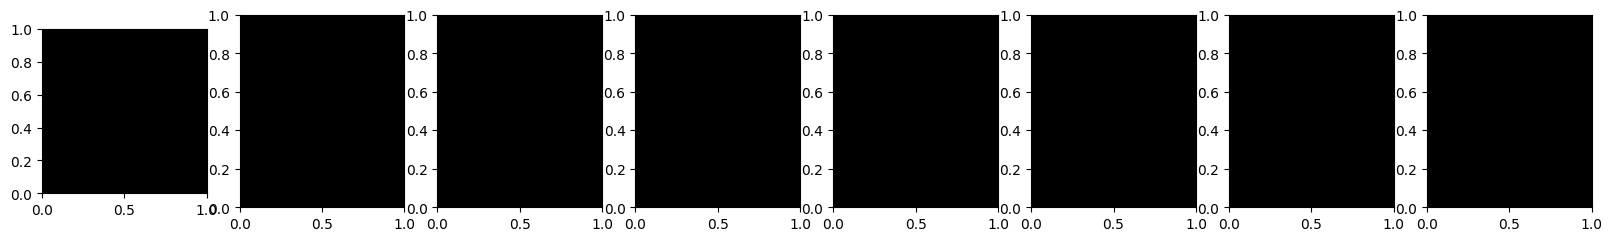

In [256]:
# Visualize support images
visualize_tensors({'Support Images': support_images})

# Visualize support labels
visualize_tensors({'Support Labels': support_labels})

### Inference Analysis


In [257]:
# Dice metric for measuring volume agreement
def dice_score(y_pred: torch.Tensor, y_true: torch.Tensor) -> float:
    y_pred = y_pred.long()
    y_true = y_true.long()
    score = 2*(y_pred*y_true).sum() / (y_pred.sum() + y_true.sum())
    return score.item()

In [258]:
# run inference and compute losses for one test image
@torch.no_grad()
def inference(model, image, label, support_images, support_labels):
    image, label = image.to(device), label.to(device)

    # inference
    logits = model(
        image[None],
        support_images[None],
        support_labels[None]
    )[0] # outputs are logits

    soft_pred = torch.sigmoid(logits)
    hard_pred = soft_pred.round().clip(0,1)

    #  score
    score = dice_score(hard_pred, label)

    # return a dictionary of all relevant variables
    return {'Image': image,
            'Soft Prediction': soft_pred,
            'Prediction': hard_pred,
            'Ground Truth': label,
            'score': score}

In [259]:
from collections import defaultdict

n_predictions = 10

results = defaultdict(list)

# compute inference and save predictions and metrics for n_predictions
idxs = np.random.permutation(len(d_test))[:n_predictions]

for i in tqdm(idxs):
    image, label = d_test[i]
    vals = inference(model, image, label, support_images, support_labels)
    for k, v in vals.items():
        results[k].append(v)

# visualize the results, along with their scores
scores = results.pop('score')
visualize_tensors(results,
                  col_names=[f'Dice = {100*s:.1f}' for s in scores],
                  title='Test Predictions',
                  col_wrap=n_predictions)

  0%|          | 0/10 [00:00<?, ?it/s]

AttributeError: 'numpy.ndarray' object has no attribute 'to'

### Effect of the Support Set Size

In [262]:
# d_support = WBCDataset('JTSC', split='support', label='cytoplasm')
# d_test = WBCDataset('JTSC', split='test', label='cytoplasm')

n_support = 64

support_images, support_labels = zip(*itertools.islice(d_support, n_support))
support_images = torch.stack(support_images).to(device)
support_labels = torch.stack(support_labels).to(device)

TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray

In [263]:
n_predictions = 3
support_set_sizes = [1, 2, 4, 8, 16, 32, 64]

idxs = np.random.permutation(len(d_test))[:n_predictions]

for i in idxs:
    results = defaultdict(list)
    for N in support_set_sizes:
        image, label = d_test[i]
        vals = inference(model, image, label, support_images[:N], support_labels[:N])
        for k, v in vals.items():
            results[k].append(v)

    # visualize for this entry for different support sizes
    scores = results.pop('score')
    col_names = [f'N = {N}' for N in support_set_sizes]
    col_names = [col+f'\nDice: {100*score:.1f}' for col, score in zip(col_names, scores)]
    visualize_tensors(results, col_names=col_names, title='Test Predictions for varying Support Set size $N$', col_wrap=len(support_set_sizes))

AttributeError: 'numpy.ndarray' object has no attribute 'to'